In [14]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
iris_dataset = datasets.load_iris()

In [5]:
print(iris_dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [7]:
X = iris_dataset.data
y = iris_dataset.target

print('Input data shape: ', X.shape)
print('Target variable: ', y.shape)

Input data shape:  (150, 4)
Target variable:  (150,)


Comparing OvR Multi-class Classification against Multinomial Classification of Logistic Regression using sklearn

Split Data into train and test sets for model Evaluation

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56, stratify=y)

In [9]:
# Instantiate class StandardScaler

normalise = StandardScaler()
normalise.fit(X_train)

X_train_std = normalise.transform(X_train)
X_test_std = normalise.transform(X_test)

First with OvR

In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=56, solver='lbfgs',
                        multi_class='ovr')

lr.fit(X=X_train_std, y=y_train)

LogisticRegression(C=100.0, multi_class='ovr', random_state=56)

In [19]:
from sklearn.metrics import plot_confusion_matrix, classification_report, ConfusionMatrixDisplay, confusion_matrix


predictions = lr.predict(X_train_std)
cm = confusion_matrix(y_true=y_train, y_pred=predictions)

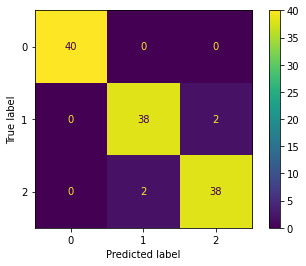

In [20]:
confusion_plot = ConfusionMatrixDisplay(confusion_matrix=cm)
confusion_plot.plot()
plt.show()

In [22]:
print(classification_report(y_true=y_train, y_pred=predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.95      0.95      0.95        40
           2       0.95      0.95      0.95        40

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



Secondly with the Nominal Classification

This is set by default 

In [23]:
lr_nominal = LogisticRegression(C=100.0, random_state=56, solver='lbfgs')

lr_nominal.fit(X=X_train_std, y=y_train)

LogisticRegression(C=100.0, random_state=56)

In [24]:
predictions_n = lr.predict(X_train_std)
cm_n = confusion_matrix(y_true=y_train, y_pred=predictions_n)

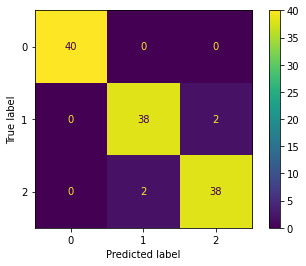

In [25]:
confusion_plot_n = ConfusionMatrixDisplay(confusion_matrix=cm_n)
confusion_plot_n.plot()
plt.show()

In [26]:
print(classification_report(y_true=y_train, y_pred=predictions_n))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.95      0.95      0.95        40
           2       0.95      0.95      0.95        40

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120

